Some pre-work and generate csv files

In [3]:
import pandas as pd
import json
json.loads('["foo", {"bar":["baz", null, 1.0, 2]}]')
['foo', {'bar': ['baz', None, 1.0, 2]}]

['foo', {'bar': ['baz', None, 1.0, 2]}]

In [ ]:
with open('tip.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    text = []
    for line in iter_f: 
        d = json.loads(line)
        text.append(d['text'])
    f.close()
#print the first two to check
print(text[0])
print(text[1])

In [2]:
with open('user.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    user_id = []
    for line in iter_f: 
        d = json.loads(line)
        user_id.append(d['user_id'])
    f.close()
#print the first two to check
print(user_id[0])
print(user_id[1])

4XChL029mKr5hydo79Ljxg
bc8C_eETBWL0olvFSJJd0w


import json

In [7]:
with open('business.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    business_id = []
    for line in iter_f: 
        d = json.loads(line)
        business_id.append(d['business_id'])
    f.close()
print(business_id[0])

In [18]:
import pandas as pd
business = pd.read_json('business.json', lines = True)

In [30]:
restaurants = business[business.categories.str.contains('Restaurant') == True].sort_values('stars', ascending = False).reset_index().drop('index', axis = 1)

In [73]:
restaurant_category_counts = restaurants['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

check the restaurants with most reviews. 

In [58]:
restaurant_category_counts.nlargest(20)

Restaurants, Pizza                     1042
Pizza, Restaurants                      993
Mexican, Restaurants                    885
Restaurants, Mexican                    853
Chinese, Restaurants                    840
Restaurants, Chinese                    789
Restaurants, Italian                    474
Italian, Restaurants                    446
American (Traditional), Restaurants     282
Restaurants, American (Traditional)     272
Vietnamese, Restaurants                 272
Restaurants, Vietnamese                 264
Restaurants, Thai                       261
Restaurants                             256
Thai, Restaurants                       254
American (New), Restaurants             240
Japanese, Restaurants                   235
Sandwiches, Restaurants                 227
Indian, Restaurants                     226
Restaurants, Burgers                    219
dtype: int64

In [37]:
restaurant_category_counts = restaurants['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)
restaurant_category_counts.nlargest(10)
restaurant_category_counts = pd.DataFrame(restaurant_category_counts)


,business_id,review_count,stars,state
0,rrGE7mtHnWPaLwaCj9JZYg,13,4.5,AZ
1,ni8n5i3DKhlXLjf251VR3Q,5,5.0,AZ
2,B7-GX7wDy2TcclzlizYlJg,4,3.0,NV
3,kZWjEMEM4vCBL9GaQy-spw,6,5.0,AZ
4,o6ZyBPhitJEh1EvZiVlziA,10,4.0,NV


In [71]:
final_df = business[business.categories.str.contains('Chinese') == True].sort_values('categories').reset_index(drop = True).drop(['postal_code'], axis = 1)
final_df.head()


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,"7650 E Redfield Rd, Ste C3","{'GoodForKids': 'True', 'BusinessParking': '{'...",rrGE7mtHnWPaLwaCj9JZYg,"Active Life, Acupuncture, Tai Chi, Fitness & I...",Scottsdale,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '...",1,33.614365,-111.915201,HNJ Healing Clinic,13,4.5,AZ
1,"1989 W Elliot Rd, Ste 17",{'GoodForKids': 'True'},ni8n5i3DKhlXLjf251VR3Q,"Active Life, Brazilian Jiu-jitsu, Chinese Mart...",Chandler,"{'Monday': '15:0-20:0', 'Tuesday': '15:0-20:0'...",1,33.348826,-111.874745,ACS Martial Arts,5,5.0,AZ
2,"3120 South Valley View, Ste C","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",B7-GX7wDy2TcclzlizYlJg,"Active Life, Chinese Martial Arts, Specialty S...",Las Vegas,"{'Monday': '19:0-21:0', 'Tuesday': '19:0-21:0'...",0,36.133536,-115.189031,Las Vegas Wing Chun Kung Fu School,4,3.0,NV
3,"20833 N Cave Creek Rd, Ste 102","{'BusinessAcceptsCreditCards': 'True', 'Busine...",kZWjEMEM4vCBL9GaQy-spw,"Active Life, Fitness & Instruction, Martial Ar...",Phoenix,"{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ...",1,33.675335,-112.030013,9 Dragons Kung Fu,6,5.0,AZ
4,"9310 S Eastern Ave, Ste 123","{'GoodForKids': 'True', 'BusinessAcceptsCredit...",o6ZyBPhitJEh1EvZiVlziA,"Active Life, Fitness & Instruction, Tai Chi, A...",Las Vegas,None,1,36.019101,-115.116932,Shaolin Tai Chi Cultural Center,10,4.0,NV


In [72]:
final_df.to_csv('chinese_rest_all.csv')

In [21]:
tip=pd.read_json('tip.json',lines=True)

In [22]:
tip.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [23]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [94]:
business_ids = final_df['business_id'].values
business_ids[:5]

array(['rrGE7mtHnWPaLwaCj9JZYg', 'ni8n5i3DKhlXLjf251VR3Q',
       'B7-GX7wDy2TcclzlizYlJg', 'kZWjEMEM4vCBL9GaQy-spw',
       'o6ZyBPhitJEh1EvZiVlziA'], dtype=object)

In [33]:
review_reader = pd.read_json('review.json', lines=True, chunksize=100000)

In [39]:

reviews = [review.loc[review['business_id'].apply(lambda x: x in business_ids)] for review in review_reader]

In [40]:
reviews = pd.concat(reviews)

In [41]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
100002,hcFSc0OHgZJybnjQBrL_8Q,0,2016-05-08 03:11:41,0,5snkYFX0RLtlfSIbJ-klcQ,5,"Nice atmosphere, good quality and fast service...",0,dj2o6uma8vyEVqX8a1lKtw
100022,EKQiKd7EMZjsa4JokFaeAg,2,2006-08-08 03:53:39,4,l9cDhYknmTsd0EvXk56U7w,2,"Oh man, my experience with this place was my w...",4,gxRw9c2lvijXBNhKU5i7_g
100038,vx4YAA02Qz6khRD1fZ1MFA,0,2015-06-10 23:31:40,0,5vdzLcVNDJ7VMSMKTGGEhg,3,Came here really late after the Penn and Telle...,0,6sGoqiMXlQyhwc1apN_s-g
100057,MhnihE0alud0ereVInSt8Q,1,2013-12-09 23:12:22,10,8o9cW61yYwMxEWHYIpGK4A,4,Let me paint you a picture. It's getting kind ...,2,iaPgzNcZnOxLYOrJWwU7rQ
100078,Vs7gc9EE3k9wARuUcN9piA,0,2016-07-17 03:31:57,0,p32nOfmo_8UmAvjupwJ1EA,5,This family owned hidden gem is a win win for ...,0,i7vdmvgR3nam-Qo96-Cu7A


In [42]:
reviews.to_csv('chinese_res_reviews.csv', index = False)

In [47]:
tip_reader = pd.read_json('tip.json', lines=True, chunksize=100000)

In [49]:
tips = [tip.loc[tip['business_id'].apply(lambda x: x in business_ids)] for tip in tip_reader]

In [ ]:
tips = pd.concat(tips)
tips.to_csv('chinese_res_tips.csv', index = False)

In [75]:
business_us=pd.read_csv('chinese_canada_review10.csv')

In [77]:
business_us.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state
0,575 28 Street SE,"{'OutdoorSeating': 'False', 'Alcohol': ""u'beer...",3pTp_EDVffBFTUNKCOXjdw,"Buffets, Restaurants, Asian Fusion, Chinese",Calgary,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,51.047310,-113.990064,New Dynasty Buffet Restaurant,10,2.5,AB
1,"4307 130th Avenue SE, Suite 27","{'RestaurantsTakeOut': 'True', 'RestaurantsPri...",iVGeWvofA_e3G0A2Qomwhg,"Chinese, Restaurants",Calgary,"{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",0,50.930132,-113.971662,Kung Fu Restaurant,10,3.0,AB
2,3819 Bow Trail SW,"{'RestaurantsDelivery': 'True', 'OutdoorSeatin...",UglIW3RciYxD701IaiDn8A,"Chinese, Restaurants",Calgary,"{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",1,51.045394,-114.142846,Toi Shan Restaurant,10,4.0,AB
3,736 17 Ave SW,"{'BusinessParking': ""{'garage': False, 'street...",m7a1SG9yXes6Ir_ULzjWKA,"Chinese, Restaurants, Food",Calgary,NaN,0,51.037961,-114.078938,Wok Box,10,2.5,AB
4,19369 Sheriff King Street SW,"{'GoodForMeal': ""{'dessert': False, 'latenight...",nDTNgSf1IZKz-qHXySxG1w,"Food, Restaurants, Chinese, Asian Fusion",Calgary,NaN,1,50.879315,-114.072993,Kung Fu Restaurant,10,3.0,AB


In [98]:
business_ids_us =business_us['business_id'].values
business_ids_us

array(['3pTp_EDVffBFTUNKCOXjdw', 'iVGeWvofA_e3G0A2Qomwhg',
       'UglIW3RciYxD701IaiDn8A', ..., 'O1TvPrgkK2bUo5O5aSZ7lw',
       '_xAJZOKBMPOe47p1MphB2w', 'zgQHtqX0gqMw1nlBZl2VnQ'], dtype=object)

In [5]:
import pandas as pd
def load_json(file_name):
    with open(file_name, encoding='utf-8') as f:
        iter_f = iter(f)
        line = f.readline()
        list_name = []
        for line in iter_f:
            d = json.loads(line)
            list_name.append(d)
        f.close()
    return pd.DataFrame(list_name)
user = load_json('user.json')

In [6]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
1,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
2,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
3,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50
4,4.20,483,44,483,350,3,46,221,195,404,...,3048,"2015,2016,2017,2018",186,"AJxDPGVTzefy3vSHWJchvQ, TgveR4qIsr0Q7b4MJK29TA...",2424,Marilyn,214,3475,0rK89TS8xqy1wI4nYI1wfw,2011-06-23 08:05:13


In [7]:
user.to_csv("user.csv")

Try to merge the reviews and business

In [6]:
reviews_us=pd.read_csv('reviews_canada_chinese.csv')
business_us=pd.read_csv('chinese_canada_review10.csv')

In [8]:
reviews_us.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XYIPXJ9parr9FtvvcGI1SA,0,2017-10-26 22:19:54,0,NKkGq0S88nKpY4PZWWu2ng,4,"Limited menu, but what they do, they do well. ...",0,K0t1QSb3qvdhuT8sDWZKXA
1,yDVedcyujtCPyuJdPp-ZGw,0,2016-07-05 20:36:44,0,3uoNDcZQkj0tPUrlFpI9gw,5,"This is a great place for korean food, I don't...",2,2qEgXNdVKX4UfAl0_GgNAw
2,HQpMwOOrGND3GaRqMNV9ig,0,2016-01-31 07:14:23,0,DV7UzrksdeChRFfpnDF-5g,3,This was my first time here and i decided to o...,2,PIjv6CzX4J4quhsnzi1l1A
3,XYIPXJ9parr9FtvvcGI1SA,0,2017-05-27 04:29:27,1,HJ3cl6vcQsRcDPEjtiMaJQ,5,Wife and I went back and ordered the mega bowl...,0,RaGlEeOrnUTPsaSvnwnNvg
4,l9vx-OTdDPU-oHZ17aVxdg,0,2015-09-25 20:20:37,0,iBISEpeqhiAkBPVd-VtcWw,4,Quintessentially Hakka - this is by far the be...,3,yT_QCcnq-QGipWWuzIpvtw


In [4]:
business_with_review=pd.merge(reviews_us,business_us,on='business_id')

In [5]:
business_with_review.head()

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,address,...,categories,city,hours,is_open,latitude,longitude,name,review_count,stars_y,state
0,XYIPXJ9parr9FtvvcGI1SA,0,2017-10-26 22:19:54,0,NKkGq0S88nKpY4PZWWu2ng,4,"Limited menu, but what they do, they do well. ...",0,K0t1QSb3qvdhuT8sDWZKXA,66 Edward Street,...,"Chinese, Restaurants, Noodles",Toronto,"{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...",1,43.656755,-79.383725,GB Hand-pulled Noodles,421,4.0,ON
1,XYIPXJ9parr9FtvvcGI1SA,0,2017-05-27 04:29:27,1,HJ3cl6vcQsRcDPEjtiMaJQ,5,Wife and I went back and ordered the mega bowl...,0,RaGlEeOrnUTPsaSvnwnNvg,66 Edward Street,...,"Chinese, Restaurants, Noodles",Toronto,"{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...",1,43.656755,-79.383725,GB Hand-pulled Noodles,421,4.0,ON
2,XYIPXJ9parr9FtvvcGI1SA,0,2017-10-26 20:46:42,0,vU2_oFwbKcSBkgGOToybnQ,5,Excellent hot noodle soup for a reasonable pri...,0,BTkjBJ-ocgYBqOkS1hctVw,66 Edward Street,...,"Chinese, Restaurants, Noodles",Toronto,"{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...",1,43.656755,-79.383725,GB Hand-pulled Noodles,421,4.0,ON
3,XYIPXJ9parr9FtvvcGI1SA,0,2017-12-31 06:28:34,0,E3YLU5ImTOZSkCUr6Y_-0g,4,Noodles are good and tasty. Always consistent ...,0,Cxhe1bXGdurXMroZPxBH-A,66 Edward Street,...,"Chinese, Restaurants, Noodles",Toronto,"{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...",1,43.656755,-79.383725,GB Hand-pulled Noodles,421,4.0,ON
4,XYIPXJ9parr9FtvvcGI1SA,0,2017-07-09 22:36:30,0,yhiYckAuPZXqU8ZN026DGg,5,Super good! Noodles were amazing. Service wa...,0,I2RhujnCWeRYHCeXSnpojg,66 Edward Street,...,"Chinese, Restaurants, Noodles",Toronto,"{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...",1,43.656755,-79.383725,GB Hand-pulled Noodles,421,4.0,ON


In [6]:
business_with_review.to_csv('business_with_review.csv')

In [23]:
stars_business=business_us.stars.values


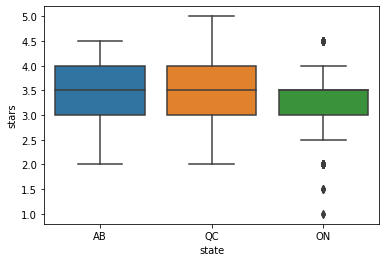

In [27]:
import seaborn as sns
sns.boxplot(x='state',y="stars",data=business_us)

Reviews word cloud

In [34]:
reviews_us.text.head()
reviews_us.text.to_csv('reviews_text.txt',header=False)

clean the reviews

In [47]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
nltk.download('wordnet')
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

## try to clean the reviews
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_us['clean_reviews'] = reviews_us['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tiger\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [50]:
reviews_us.to_csv('clean_reviews.csv')
business_with_clean_review=pd.merge(reviews_us,business_us,on='business_id')
business_with_clean_review.to_csv('with clean_reviews.csv')

In [54]:
reviews_us.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,clean_reviews
0,XYIPXJ9parr9FtvvcGI1SA,0,2017-10-26 22:19:54,0,NKkGq0S88nKpY4PZWWu2ng,4,"Limited menu, but what they do, they do well. ...",0,K0t1QSb3qvdhuT8sDWZKXA,limited menu well portion generous broth delic...
1,yDVedcyujtCPyuJdPp-ZGw,0,2016-07-05 20:36:44,0,3uoNDcZQkj0tPUrlFpI9gw,5,"This is a great place for korean food, I don't...",2,2qEgXNdVKX4UfAl0_GgNAw,great place korean food know busy wife usually...
2,HQpMwOOrGND3GaRqMNV9ig,0,2016-01-31 07:14:23,0,DV7UzrksdeChRFfpnDF-5g,3,This was my first time here and i decided to o...,2,PIjv6CzX4J4quhsnzi1l1A,first time decide order shrimp wonton soup sou...
3,XYIPXJ9parr9FtvvcGI1SA,0,2017-05-27 04:29:27,1,HJ3cl6vcQsRcDPEjtiMaJQ,5,Wife and I went back and ordered the mega bowl...,0,RaGlEeOrnUTPsaSvnwnNvg,wife go back order mega bowl lanzhou hand-pull...
4,l9vx-OTdDPU-oHZ17aVxdg,0,2015-09-25 20:20:37,0,iBISEpeqhiAkBPVd-VtcWw,4,Quintessentially Hakka - this is by far the be...,3,yT_QCcnq-QGipWWuzIpvtw,quintessentially hakka far best gta \r\n\r\nth...
